Decision Tree

In [ ]:
# 1. Prepare decision tree classifier in python using sklearn library for data set diabetes.csv - (pregnant, glucose, bp, skin, insulin, bmi, pedigree, age, label). Use all features except label as independent variable. Use complete dataset for training and limit the depth of tree upto 3 levels and plot using tree.plotTree()method.

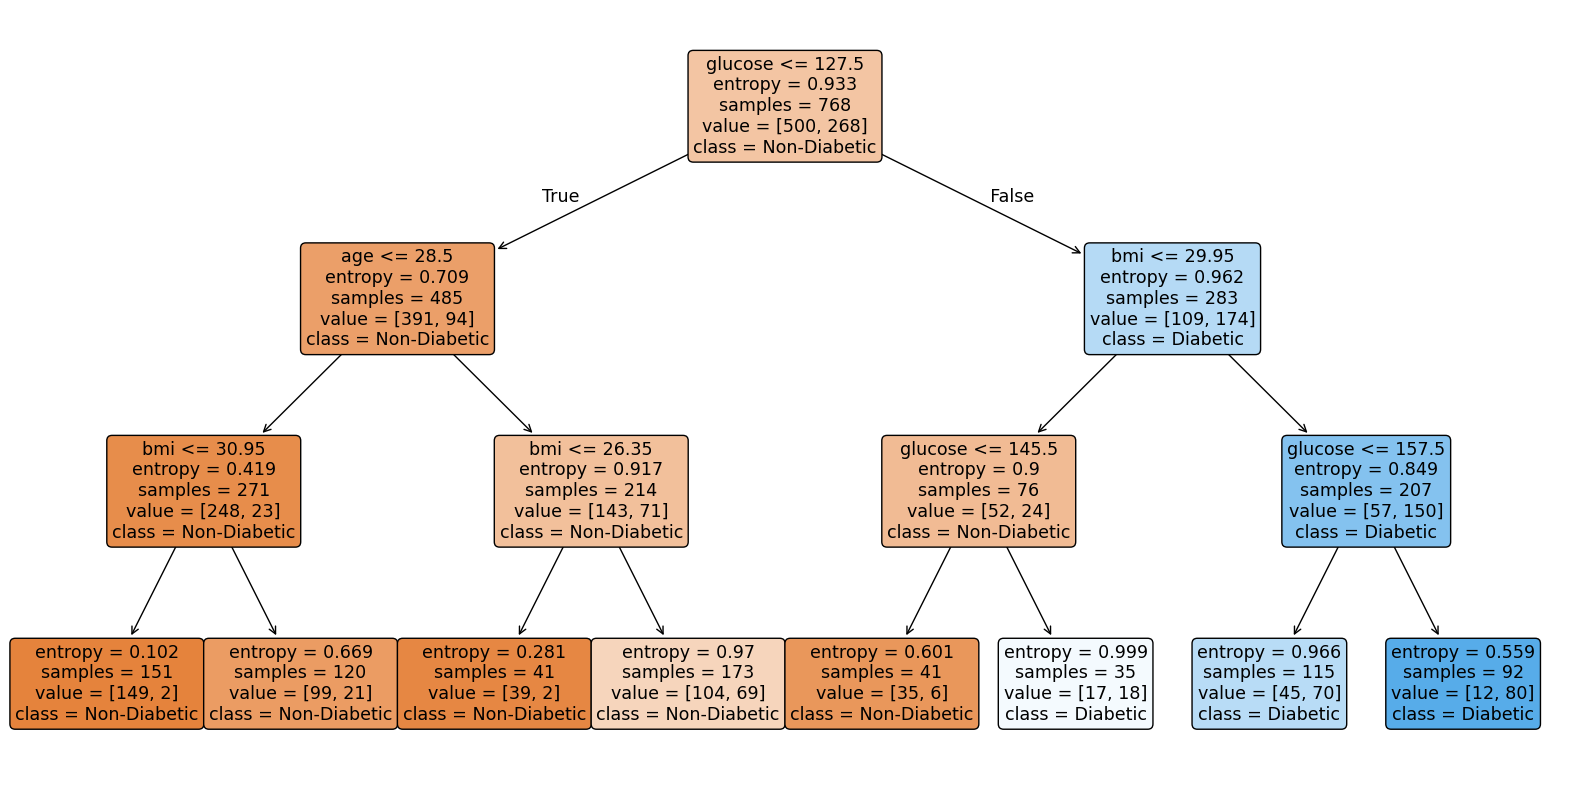

In [ ]:
# Import required libraries

import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

# Load the dataset
# Note: We rename the columns to match the names specified in the instructions
data = pd.read_csv("diabetes.csv")
data.columns = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']

# Separate independent and dependent variables

X = data.drop("label", axis=1)
y = data["label"]

# Create and train the Decision Tree Classifier

clf = DecisionTreeClassifier(
    criterion="entropy",
    max_depth=3,
    random_state=42
)

clf.fit(X, y)

# Plot the Decision Tree

plt.figure(figsize=(20, 10))
tree.plot_tree(
    clf,
    feature_names=X.columns,
    class_names=["Non-Diabetic", "Diabetic"],
    filled=True,
    rounded=True
)
plt.show()

In [ ]:
# 2. Using the diabetes dataset, implement a Decision Tree Classifier and determine the importance of each feature in predicting diabetes. Generate different plots to justify your model.

    Feature  Importance
1   glucose    0.492488
5       bmi    0.271401
7       age    0.141969
2        bp    0.043612
4   insulin    0.026136
0  pregnant    0.024394
3      skin    0.000000
6  pedigree    0.000000


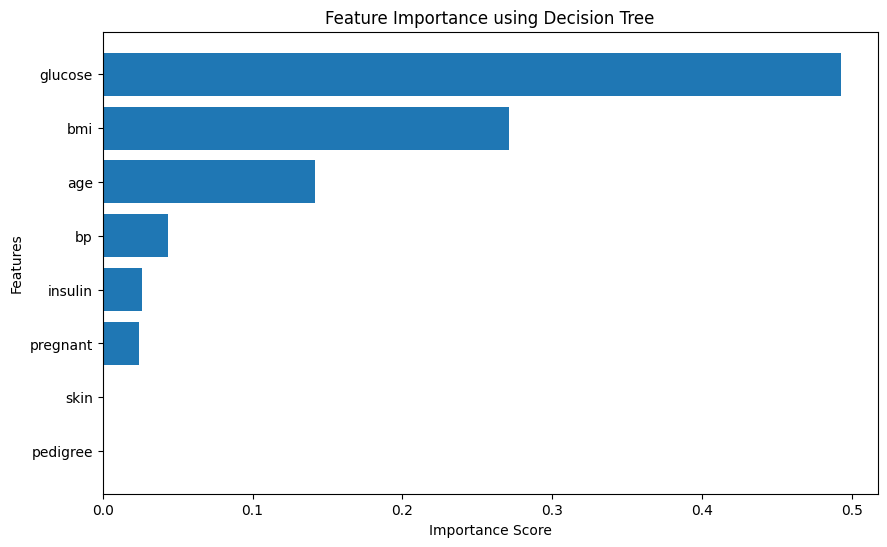

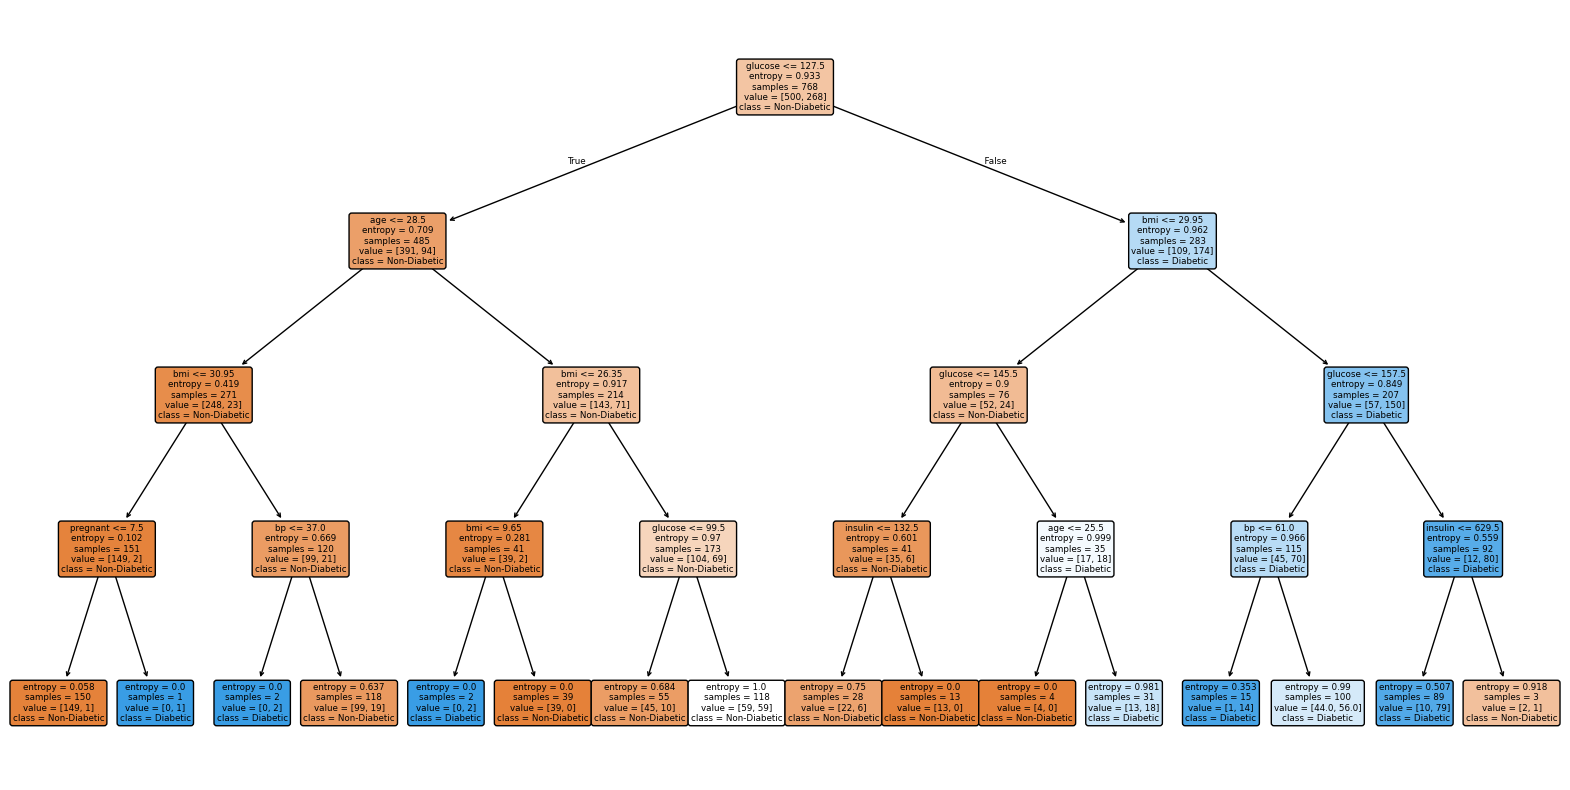

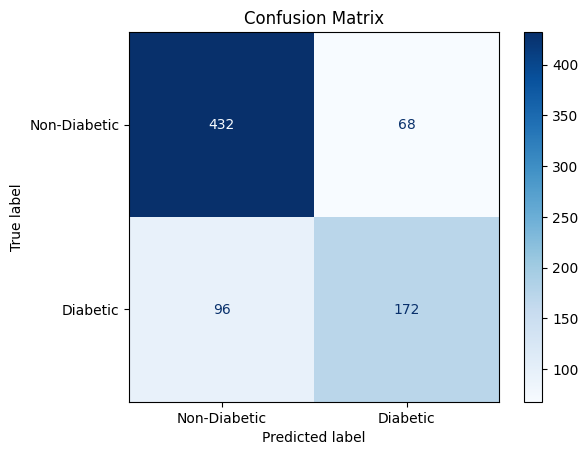

Model Accuracy: 0.7864583333333334


In [ ]:
# Import required libraries

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Load the diabetes dataset

data = pd.read_csv("diabetes.csv")

# Rename columns to match the expected names
data.columns = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']

# Split features and target

X = data.drop("label", axis=1)
y = data["label"]

# Train Decision Tree Classifier

model = DecisionTreeClassifier(
    criterion="entropy",
    max_depth=4,
    random_state=42
)

model.fit(X, y)

# Feature Importance

importances = model.feature_importances_

feature_importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

print(feature_importance_df)

# Plot 1: Feature Importance Bar Chart

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df["Feature"], feature_importance_df["Importance"])
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance using Decision Tree")
# Invert y-axis to show the most important features at the top
plt.gca().invert_yaxis()
plt.show()

# Plot 2: Decision Tree Visualization

plt.figure(figsize=(20, 10))
tree.plot_tree(
    model,
    feature_names=X.columns,
    class_names=["Non-Diabetic", "Diabetic"],
    filled=True,
    rounded=True
)
plt.show()

# Plot 3: Confusion Matrix

y_pred = model.predict(X)

cm = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Non-Diabetic", "Diabetic"])

disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

# Model Accuracy

accuracy = accuracy_score(y, y_pred)
print("Model Accuracy:", accuracy)

In [ ]:
# 3. Implement a Decision Tree Classifier and compare its performance with a SVM Classifier on the iris dataset. Display the accuracy of both models.

In [ ]:
# Import required libraries

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the Iris dataset

iris = load_iris()
X = iris.data
y = iris.target

# Split data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Decision Tree Classifier

dt_model = DecisionTreeClassifier(
    criterion="entropy",
    random_state=42
)

dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

dt_accuracy = accuracy_score(y_test, dt_pred)

# Train Support Vector Machine (SVM) Classifier

svm_model = SVC(kernel="linear", random_state=42)

svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)

svm_accuracy = accuracy_score(y_test, svm_pred)

# Display Accuracy of Both Model

print("Decision Tree Accuracy:", dt_accuracy)
print("SVM Accuracy:", svm_accuracy)

Decision Tree Accuracy: 0.9777777777777777
SVM Accuracy: 1.0


In [ ]:
# 4. Build decision tree classifier for iris data set. One with maximum leaf nodes up to 8 and another one with minimum sample per leaf as 5. Compare accuracy of both models.

In [ ]:
# Import required libraries

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset

iris = load_iris()
X = iris.data
y = iris.target

# Split dataset into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Model 1: Decision Tree with max_leaf_nodes =

dt_max_leaf = DecisionTreeClassifier(
    max_leaf_nodes=8,
    random_state=42
)

dt_max_leaf.fit(X_train, y_train)
pred_leaf = dt_max_leaf.predict(X_test)

accuracy_leaf = accuracy_score(y_test, pred_leaf)

# Model 2: Decision Tree with min_samples_leaf = 5

dt_min_samples = DecisionTreeClassifier(
    min_samples_leaf=5,
    random_state=42
)

dt_min_samples.fit(X_train, y_train)
pred_samples = dt_min_samples.predict(X_test)

accuracy_samples = accuracy_score(y_test, pred_samples)

# Compare Accuracies

print("Accuracy with max_leaf_nodes = 8 :", accuracy_leaf)
print("Accuracy with min_samples_leaf = 5 :", accuracy_samples)

Accuracy with max_leaf_nodes = 8 : 1.0
Accuracy with min_samples_leaf = 5 : 1.0


In [ ]:
# 5. Implement a Decision Tree Classifier and compare its performance with a
# Logistic Classifier on the diabetes dataset. Develop Python code to display the accuracy of both models.

In [ ]:
# Import required libraries

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the diabetes dataset

data = pd.read_csv("diabetes.csv")

# Rename columns to match the expected names used in the code
data.columns = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']

# Split features and target variable

X = data.drop("label", axis=1)
y = data["label"]

# Train–Test split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Decision Tree Classifier

dt_model = DecisionTreeClassifier(
    criterion="entropy",
    max_depth=5,
    random_state=42
)

dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

dt_accuracy = accuracy_score(y_test, dt_pred)

# Logistic Regression Classifier

log_model = LogisticRegression(max_iter=1000)

log_model.fit(X_train, y_train)
log_pred = log_model.predict(X_test)

log_accuracy = accuracy_score(y_test, log_pred)

# Display accuracy of both models

print("Decision Tree Accuracy:", dt_accuracy)
print("Logistic Regression Accuracy:", log_accuracy)

Decision Tree Accuracy: 0.7748917748917749
Logistic Regression Accuracy: 0.7359307359307359


In [ ]:
# 6. Develop a random dataset using 3 columns and 350 rows. Generate the data frame and apply decision tree classifier to train the model. Compare the accuracy of the model with any 2 other models you can apply on the generated dataset. Generate plot of comparing the accuracy for different models.

   Feature1  Feature2  Feature3  Target
0  0.374540  0.950714  0.731994       0
1  0.598658  0.156019  0.155995       0
2  0.058084  0.866176  0.601115       0
3  0.708073  0.020584  0.969910       1
4  0.832443  0.212339  0.181825       1
Decision Tree Accuracy : 0.5714285714285714
Logistic Regression Accuracy : 0.5333333333333333
KNN Accuracy : 0.5904761904761905


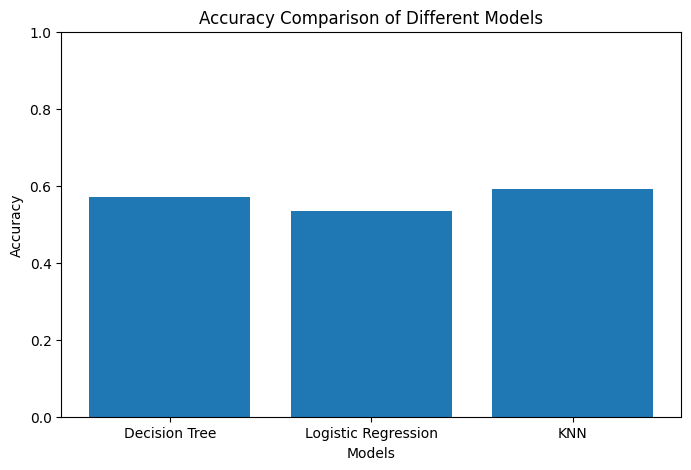

In [ ]:
# Import required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Generate a random dataset (3 columns, 350 rows)
np.random.seed(42)

X = np.random.rand(350, 3)   # 3 feature columns
y = np.random.randint(0, 2, 350)  # binary target (0 or 1)

# Create DataFrame
data = pd.DataFrame(X, columns=["Feature1", "Feature2", "Feature3"])
data["Target"] = y

print(data.head())

# Split dataset into training and testing sets

X = data.drop("Target", axis=1)
y = data["Target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Model 1: Decision Tree Classifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

dt_pred = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)

# Model 2: Logistic Regression

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

lr_pred = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_pred)

# Model 3: K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

knn_pred = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_pred)

# Display accuracy of all models

print("Decision Tree Accuracy :", dt_accuracy)
print("Logistic Regression Accuracy :", lr_accuracy)
print("KNN Accuracy :", knn_accuracy)


# Plot accuracy comparison of models

models = ["Decision Tree", "Logistic Regression", "KNN"]
accuracies = [dt_accuracy, lr_accuracy, knn_accuracy]

plt.figure(figsize=(8, 5))
plt.bar(models, accuracies)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Accuracy Comparison of Different Models")
plt.ylim(0, 1)
plt.show()

In [ ]:
# 7. Using the diabetes dataset, implement a Decision Tree Classifier and plot ccp_alpha of built tree against any one DT parameter (node count or maximum depth). please add comments for reading and understanding

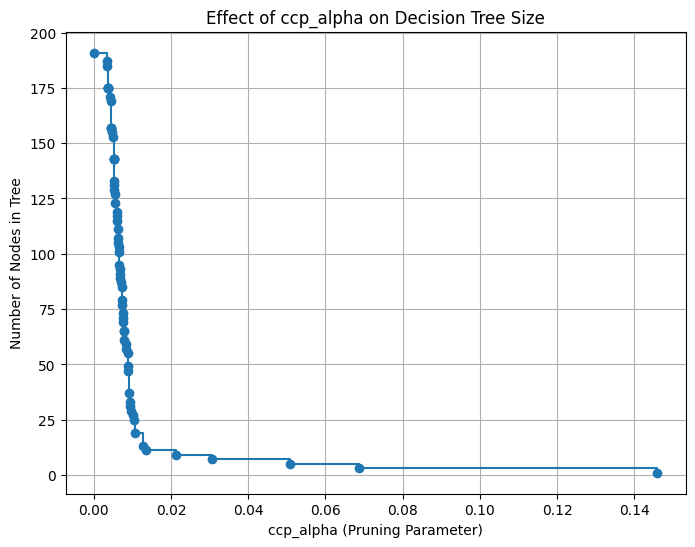

In [ ]:
# Import required libraries

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Load the diabetes dataset

# Load dataset
data = pd.read_csv("diabetes.csv")

# Rename columns to match the expected names
data.columns = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']

# Separate features and target
X = data.drop("label", axis=1)
y = data["label"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Create a full decision tree
dt = DecisionTreeClassifier(
    criterion="entropy",
    random_state=42
)

dt.fit(X_train, y_train)

# Obtain pruning path
path = dt.cost_complexity_pruning_path(X_train, y_train)

ccp_alphas = path.ccp_alphas       # effective alphas
impurities = path.impurities       # corresponding impurities

node_counts = []

# Train a tree for each alpha and store number of nodes
for alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        criterion="entropy",
        random_state=42,
        ccp_alpha=alpha
    )
    clf.fit(X_train, y_train)
    node_counts.append(clf.tree_.node_count)

# Plot: ccp_alpha vs Number of Nodes

plt.figure(figsize=(8, 6))

plt.plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")

plt.xlabel("ccp_alpha (Pruning Parameter)")
plt.ylabel("Number of Nodes in Tree")
plt.title("Effect of ccp_alpha on Decision Tree Size")
plt.grid(True)

plt.show()

In [ ]:
# 23. Write a Python code to perform Leave-One-Out Cross-Validation (LOOCV) on a dataset using a Decision Tree Classifier. The dataset consists of features and labels as specified below. Dataset Description: • The dataset consists of 100 samples with 5 features. • The target variable is binary (0 or 1). Instructions: Import the necessary libraries. • Load or create a synthetic dataset with the specified characteristics. • Implement Leave-One-Out Cross-Validation (LOOCV). • Train a Decision Tree Classifier on each training set and evaluate it on the left-out sample. Print the accuracy for each iteration and the average accuracy across all iterations.

In [ ]:
# 1. Import necessary libraries
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score

# 2. Create a synthetic dataset
# 100 samples, 5 features
np.random.seed(42)   # For reproducibility

X = np.random.rand(100, 5)           # Feature matrix
y = np.random.randint(0, 2, 100)     # Binary target labels (0 or 1)

# 3. Initialize Leave-One-Out Cross-Validation
loo = LeaveOneOut()

# Create Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42)
# 4. Perform LOOCV
accuracies = []   # To store accuracy of each iteration
iteration = 1

for train_index, test_index in loo.split(X):

    # Split data into training and test sets
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train the model
    model.fit(X_train, y_train)

    # Predict on the left-out sample
    y_pred = model.predict(X_test)

    # Calculate accuracy for this iteration
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

    # Print accuracy for this iteration
    print(f"Iteration {iteration}: Accuracy = {acc}")
    iteration += 1

# 5. Calculate and print average accuracy
average_accuracy = np.mean(accuracies)
print("\nAverage LOOCV Accuracy:", average_accuracy)


Iteration 1: Accuracy = 0.0
Iteration 2: Accuracy = 0.0
Iteration 3: Accuracy = 0.0
Iteration 4: Accuracy = 0.0
Iteration 5: Accuracy = 0.0
Iteration 6: Accuracy = 1.0
Iteration 7: Accuracy = 0.0
Iteration 8: Accuracy = 0.0
Iteration 9: Accuracy = 0.0
Iteration 10: Accuracy = 0.0
Iteration 11: Accuracy = 1.0
Iteration 12: Accuracy = 0.0
Iteration 13: Accuracy = 0.0
Iteration 14: Accuracy = 1.0
Iteration 15: Accuracy = 1.0
Iteration 16: Accuracy = 1.0
Iteration 17: Accuracy = 1.0
Iteration 18: Accuracy = 0.0
Iteration 19: Accuracy = 1.0
Iteration 20: Accuracy = 0.0
Iteration 21: Accuracy = 1.0
Iteration 22: Accuracy = 0.0
Iteration 23: Accuracy = 1.0
Iteration 24: Accuracy = 1.0
Iteration 25: Accuracy = 1.0
Iteration 26: Accuracy = 0.0
Iteration 27: Accuracy = 0.0
Iteration 28: Accuracy = 0.0
Iteration 29: Accuracy = 1.0
Iteration 30: Accuracy = 1.0
Iteration 31: Accuracy = 1.0
Iteration 32: Accuracy = 0.0
Iteration 33: Accuracy = 1.0
Iteration 34: Accuracy = 1.0
Iteration 35: Accuracy 

In [ ]:
# 24. Write a Python code to perform Leave-One-Out Cross-Validation (LOOCV) on a dataset using a Decision Tree Classifier. The dataset consists of features and labels as specified below. Dataset Description: • The dataset consists of 150 samples with 10 features. • The target variable is categorical with three classes (0, 1, 2). • Introduce some noise to the dataset to make the classification task more Instructions: • Import the necessary libraries. • Load or create a synthetic dataset with the specified characteristics (make_classification), including noise. • Implement Leave-One-Out Cross-Validation (LOOCV). • Train a Decision Tree Classifier on each training set and evaluate it on the left-out sample. • Calculate and print the accuracy for each iteration, as well as the confusion matrix for the final model. • Calculate and print the average accuracy across all iterations. Print confusion matrix and classificarion report.

In [ ]:
# 1. Import necessary libraries
import numpy as np
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 2. Create a synthetic dataset with noise
# 150 samples, 10 features, 3 classes
# flip_y introduces label noise
X, y = make_classification(
    n_samples=150,
    n_features=10,
    n_informative=7,
    n_redundant=2,
    n_classes=3,
    flip_y=0.15,          # noise in labels
    class_sep=1.0,
    random_state=42
)

# 3. Initialize Leave-One-Out Cross-Validation
loo = LeaveOneOut()

# Initialize Decision Tree Classifier
dt_model = DecisionTreeClassifier(
    criterion="entropy",
    random_state=42
)

# 4. Perform LOOCV
accuracies = []     # To store accuracy of each iteration
iteration = 1

for train_index, test_index in loo.split(X):

    # Split the dataset
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train the model
    dt_model.fit(X_train, y_train)

    # Predict the left-out sample
    y_pred = dt_model.predict(X_test)

    # Accuracy for this iteration (0 or 1)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

    print(f"Iteration {iteration}: Accuracy = {acc}")
    iteration += 1

# 5. Calculate and print average accuracy
average_accuracy = np.mean(accuracies)
print("\nAverage LOOCV Accuracy:", average_accuracy)


Iteration 1: Accuracy = 1.0
Iteration 2: Accuracy = 0.0
Iteration 3: Accuracy = 0.0
Iteration 4: Accuracy = 0.0
Iteration 5: Accuracy = 0.0
Iteration 6: Accuracy = 0.0
Iteration 7: Accuracy = 0.0
Iteration 8: Accuracy = 0.0
Iteration 9: Accuracy = 1.0
Iteration 10: Accuracy = 1.0
Iteration 11: Accuracy = 1.0
Iteration 12: Accuracy = 0.0
Iteration 13: Accuracy = 0.0
Iteration 14: Accuracy = 0.0
Iteration 15: Accuracy = 1.0
Iteration 16: Accuracy = 0.0
Iteration 17: Accuracy = 0.0
Iteration 18: Accuracy = 1.0
Iteration 19: Accuracy = 1.0
Iteration 20: Accuracy = 1.0
Iteration 21: Accuracy = 1.0
Iteration 22: Accuracy = 1.0
Iteration 23: Accuracy = 1.0
Iteration 24: Accuracy = 0.0
Iteration 25: Accuracy = 1.0
Iteration 26: Accuracy = 1.0
Iteration 27: Accuracy = 1.0
Iteration 28: Accuracy = 1.0
Iteration 29: Accuracy = 1.0
Iteration 30: Accuracy = 0.0
Iteration 31: Accuracy = 0.0
Iteration 32: Accuracy = 1.0
Iteration 33: Accuracy = 1.0
Iteration 34: Accuracy = 0.0
Iteration 35: Accuracy 

Naïve Bayes Classifier

In [30]:
# 44. The breast cancer dataset is available in the sklearn.datasets module and can be loaded using load_breast_cancer(). implement a Naive Bayes Classifier on the Breast Cancer Dataset using python's sklearn library. Assume that all features of datasets are continuous variables and must be used for building model. Perform following task. load data set, Split data for training and testing, Build a model and Predict labels of test data.

In [31]:
# Import required libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data        # Features (all continuous)
y = data.target      # Labels

# 2. Split the dataset into training and testing sets
# 70% training, 30% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 3. Build the Naive Bayes model (Gaussian NB for continuous data)
model = GaussianNB()

# Train the model
model.fit(X_train, y_train)

# 4. Predict labels for the test data
y_pred = model.predict(X_test)

# 5. Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9415204678362573

Confusion Matrix:
 [[ 57   6]
 [  4 104]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.90      0.92        63
           1       0.95      0.96      0.95       108

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171



In [32]:
# 45. Implement a Gaussian Naive Bayes classifier to predict whether a patient has diabetes based on various health metrics of PIMA.csv dataset. The dataset consists of information from 768 female Pima Indians aged 21 and older, initially gathered by the National Institute of Diabetes and Digestive and Kidney Diseases. Target variable: Diabetes (binary, 0 or 1) Attributes: Pregnancies, OGTT (Oral Glucose Tolerance Test), Blood pressure, Skin thickness, Insulin, BMI (Body Mass Index), Age, Pedigree diabetes function.Load the Dataset from a CSV file. Provide summary statistics for the dataset. Split the data into training and testing sets (80% train, 20% test). Instantiate a Gaussian Naive Bayes model and fit it on the training data. Predict diabetes status for the test set. Discuss any biases in the dataset and how they may affect model performance

In [42]:
# Load Required Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define column names based on the dataset description
column_names = [
    'Pregnancies', 'OGTT', 'BloodPressure', 'SkinThickness',
    'Insulin', 'BMI', 'Pedigree', 'Age', 'Diabetes'
]

# Load dataset - using header=None because the file lacks a header row
data = pd.read_csv("PIMA.csv", header=None, names=column_names)

# Provide summary statistics
print("Summary Statistics:")
print(data.describe())

# Separate features and target
X = data.drop("Diabetes", axis=1)
y = data["Diabetes"]

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Instantiate and fit Gaussian Naive Bayes model
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Predict diabetes status for the test set
y_pred = gnb.predict(X_test)

# Evaluate the model
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Summary Statistics:
       Pregnancies        OGTT  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI    Pedigree         Age    Diabetes  
count  768.000000  768.000000  768.000000  768.000000  
mean    31.992578    0.471876   33.240885    0.348958  
std      7.884160    0.331329   11.760232    0.476951  
min      0.000000    0.078000   21.000000    0.000000  
25%     27.3000

In [43]:
# 46. Build a Naive Bayes classifier to analyze the sentiment of movie reviews (positive or negative). The IMDB_Dataset.csv typically contains two main columns: Review: The text of the movie review. Sentiment: A label indicating the sentiment of the review, usually categorized as 'positive' or 'negative'. Load the dataset and inspect the structure. Clean the text data by removing punctuation, converting to lowercase, and tokenizing the reviews.Use CountVectorizer or TfidfVectorizer to convert the text data into a numerical format suitable for model training. Split the dataset and Create a Multinomial Naive Bayes model and fit it on the training data. Predict the sentiment of the test reviews.

In [75]:
# Import Libraries

import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# 1. Load dataset
# Using engine='python' and on_bad_lines='skip' to handle formatting issues (unclosed quotes)
data = pd.read_csv("IMDB_Dataset.csv", engine='python', on_bad_lines='skip')

# 2. Clean text
def clean_text(text):
    text = str(text).lower()                 # lowercase
    text = re.sub(r'[^\w\s]', '', text)     # remove punctuation
    return text

# Note: Actual column names are lowercase 'review' and 'sentiment'
data['review'] = data['review'].apply(clean_text)

# 3. Features and labels
X = data['review']
y = data['sentiment']

# 4. Convert text to numbers
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(X)

# 5. Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Train Naive Bayes model
model = MultinomialNB()
model.fit(X_train, y_train)

# 7. Predict and check accuracy
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8532469746037157


In [51]:
# Import Required Libraries

from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Load dataset (all categories)
data = fetch_20newsgroups(subset='all')

# Explore dataset
print("Number of documents:", len(data.data))
print("Number of categories:", len(data.target_names))
print("\nCategories:\n", data.target_names)

# Split Data into Features and Labels

X = data.data        # Text documents
y = data.target      # Category labels

# Convert Text to Numerical Features (CountVectorizer)

vectorizer = CountVectorizer(
    stop_words='english',
    max_features=5000
)

X_vectors = vectorizer.fit_transform(X)

# Train–Test Split

X_train, X_test, y_train, y_test = train_test_split(
    X_vectors, y, test_size=0.2, random_state=42
)

# Build and Train Multinomial Naive Bayes Model

model = MultinomialNB()
model.fit(X_train, y_train)

# Predict and Print Accuracy

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

Number of documents: 18846
Number of categories: 20

Categories:
 ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']
Model Accuracy: 0.8188328912466843


Support Vector Machines (SVM)

In [52]:
# 3. Implement a Decision Tree Classifier and compare its performance with a SVM Classifier on the iris dataset. Display the accuracy of both models.

In [53]:
# Import required libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -------------------------------
# Decision Tree Classifier
# -------------------------------
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

dt_predictions = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)

# -------------------------------
# Support Vector Machine (SVM)
# -------------------------------
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

svm_predictions = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)

# Display results
print("Decision Tree Accuracy:", dt_accuracy)
print("SVM Accuracy:", svm_accuracy)

Decision Tree Accuracy: 1.0
SVM Accuracy: 1.0


In [54]:
# 21. Write a Python code to perform k-fold cross-validation on the dataset using a Support Vector Machine (SVM) classifier. Use the following steps:
# • Import necessary libraries.
# • Prepare the dataset synthetically using make_classification.

# • Preprocess the data if necessary (e.g., scaling).
# • Implement k-fold cross-validation with 10 folds.
# • Train the SVM classifier on the training set and evaluate it on the test set for each fold.
# • Print the accuracy for each fold and the average accuracy across all folds.
# Dataset Description:
# • The dataset consists of 100 samples with 20 features.
# The target variable is binary (0 or 1).

In [55]:
# Step 1: Import necessary libraries
import numpy as np
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Step 2: Prepare synthetic dataset
X, y = make_classification(
    n_samples=100,
    n_features=20,
    n_informative=15,  # number of informative features
    n_redundant=5,     # number of redundant features
    n_classes=2,
    random_state=42
)

# Step 3: Preprocess the data (Scaling)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Step 4: Implement k-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)
fold_accuracies = []

# Step 5: Train and evaluate SVM on each fold
for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Initialize SVM classifier
    svm = SVC(kernel='linear', random_state=42)  # You can also try 'rbf'

    # Train the model
    svm.fit(X_train, y_train)

    # Predict on the test set
    y_pred = svm.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    fold_accuracies.append(accuracy)

    print(f"Accuracy for fold {fold}: {accuracy:.4f}")

# Step 6: Print average accuracy across all folds
average_accuracy = np.mean(fold_accuracies)
print(f"\nAverage Accuracy across 10 folds: {average_accuracy:.4f}")


Accuracy for fold 1: 0.7000
Accuracy for fold 2: 0.6000
Accuracy for fold 3: 0.9000
Accuracy for fold 4: 0.6000
Accuracy for fold 5: 0.8000
Accuracy for fold 6: 0.7000
Accuracy for fold 7: 1.0000
Accuracy for fold 8: 0.5000
Accuracy for fold 9: 1.0000
Accuracy for fold 10: 0.8000

Average Accuracy across 10 folds: 0.7600


In [56]:
# 26. Write a Python code to perform a Grid Search with Cross-Validation on the Iris dataset using a Support Vector Machine (SVM) classifier. The goal is to find the best hyperparameters for the SVM model.

# Dataset Description:
# • The Iris dataset consists of 150 samples with 4 features.
# • The target variable is categorical with three classes (Setosa, Versicolor, Virginica).
# Instructions:
# • Import the necessary libraries.
# • Load the Iris dataset from sklearn.datasets.
# • Split the dataset into features and labels.
# • Implement a Grid Search with 5-fold Cross-Validation to find the best hyperparameters for the SVM classifier. Consider the following hyperparameters: C: [0.1, 1, 10, 100] kernel: ['linear', 'rbf'] gamma: ['scale', 'auto']
# • Print the best hyperparameters found by the Grid Search.
# • Evaluate the best model on the entire dataset and print the accuracy.
# Generate and visualize the confusion matrix for the best model.

Best Hyperparameters: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Accuracy of the best model on the entire dataset: 0.9933


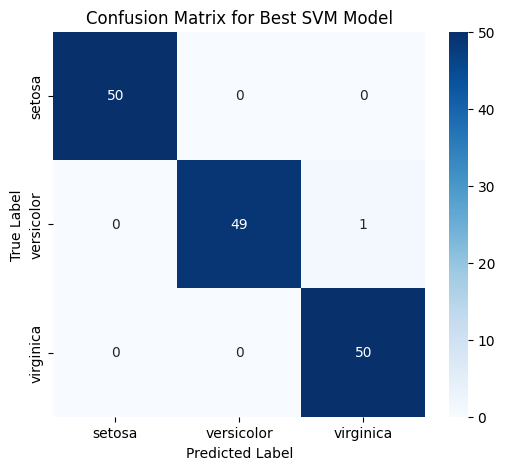

In [57]:
# Step 1: Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

# Step 2: Load the Iris dataset
iris = load_iris()
X = iris.data        # Features
y = iris.target      # Labels

# Step 3: Define SVM classifier
svm = SVC()

# Step 4: Define hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Step 5: Set up Grid Search with 5-fold Cross-Validation
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X, y)

# Step 6: Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Step 7: Evaluate the best model on the entire dataset
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X)
accuracy = accuracy_score(y, y_pred)
print(f"Accuracy of the best model on the entire dataset: {accuracy:.4f}")

# Step 8: Generate and visualize the confusion matrix
cm = confusion_matrix(y, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Best SVM Model')
plt.show()

In [58]:
# 29. You are using a Support Vector Machine (SVM) classifier for a dataset that has 3 features and 500 data points.
# If you increase the dimensionality from 3 features to 12 features, explain how the volume of the feature space changes. What are the potential challenges that arise from this increase in dimensionality?
# Instructions:
# • Provide detailed answers to both questions, incorporating concepts from machine learning and geometry.
# • Use diagrams or examples where appropriate to illustrate your points.
# Discuss the implications of high-dimensional spaces on model performance, including overfitting, computational complexity, and the curse of dimensionality.

In [59]:
# Import necessary libraries
import numpy as np
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

# -----------------------------
# Step 1: Generate synthetic dataset
# -----------------------------

# Dataset with 3 features
X_3, y_3 = make_classification(
    n_samples=500,        # 500 data points
    n_features=3,         # 3 features
    n_informative=3,      # all features are informative
    n_redundant=0,
    n_classes=2,
    random_state=42
)

# Dataset with 12 features
X_12, y_12 = make_classification(
    n_samples=500,
    n_features=12,        # 12 features
    n_informative=8,      # 8 informative, 4 redundant
    n_redundant=4,
    n_classes=2,
    random_state=42
)

# -----------------------------
# Step 2: Feature scaling
# SVM is sensitive to feature scales
# -----------------------------
scaler_3 = StandardScaler()
X_3_scaled = scaler_3.fit_transform(X_3)

scaler_12 = StandardScaler()
X_12_scaled = scaler_12.fit_transform(X_12)

# -----------------------------
# Step 3: Train SVM and evaluate using cross-validation
# -----------------------------
svm_model = SVC(kernel='linear', random_state=42)

# Evaluate on 3-feature dataset using 5-fold CV
scores_3 = cross_val_score(svm_model, X_3_scaled, y_3, cv=5, scoring='accuracy')
print("3-Feature Dataset:")
print("Accuracy per fold:", scores_3)
print("Average accuracy:", np.mean(scores_3))
print()

# Evaluate on 12-feature dataset using 5-fold CV
scores_12 = cross_val_score(svm_model, X_12_scaled, y_12, cv=5, scoring='accuracy')
print("12-Feature Dataset:")
print("Accuracy per fold:", scores_12)
print("Average accuracy:", np.mean(scores_12))
print()

3-Feature Dataset:
Accuracy per fold: [0.88 0.85 0.88 0.87 0.91]
Average accuracy: 0.8779999999999999

12-Feature Dataset:
Accuracy per fold: [0.78 0.77 0.79 0.76 0.78]
Average accuracy: 0.776



In [60]:
# 41. Consider Social_Netwok_Ads.csv dataset - (UserID, Gender, Age, EstimatedSalary, Purchased). Use Age and EstimatedSalary as input features and Purchased as target feature. Split test data set 30% of complete dataset. Build two models of support vector classifier in python using sklearn library, one for linear and another for RBF kernel with C and gamma parameters set. Predict test labels and print test accuracy.

In [62]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# -----------------------------
# Step 1: Load the dataset
# -----------------------------
data = pd.read_csv("Social_Network_Ads.csv")

# Select features and target
X = data[['Age', 'EstimatedSalary']].values
y = data['Purchased'].values

# -----------------------------
# Step 2: Split the dataset
# 70% train, 30% test
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# -----------------------------
# Step 3: Feature scaling
# SVM is sensitive to feature scales
# -----------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -----------------------------
# Step 4: Build and train SVM models
# -----------------------------

# Linear SVM
linear_svm = SVC(kernel='linear', C=1.0, random_state=42)
linear_svm.fit(X_train_scaled, y_train)

# RBF SVM
rbf_svm = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
rbf_svm.fit(X_train_scaled, y_train)

# -----------------------------
# Step 5: Predict test labels
# -----------------------------
y_pred_linear = linear_svm.predict(X_test_scaled)
y_pred_rbf = rbf_svm.predict(X_test_scaled)

# -----------------------------
# Step 6: Calculate and print accuracy
# -----------------------------
accuracy_linear = accuracy_score(y_test, y_pred_linear)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)

print(f"Test Accuracy (Linear SVM): {accuracy_linear:.4f}")
print(f"Test Accuracy (RBF SVM): {accuracy_rbf:.4f}")


Test Accuracy (Linear SVM): 0.8500
Test Accuracy (RBF SVM): 0.9417


In [63]:
# 42. Develop a Support Vector Classifier to predict whether a tumor is malignant or benign based on 30 features computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. The dataset contains 569 samples with binary labels indicating tumor type. (breast_cancer dataset of sklearn) Load the Dataset from sklearn.Split the dataset into training and testing sets.Train the SVC Model using the training data. Visualize the Results.

Feature shape: (569, 30), Labels shape: (569,)
Class names: ['malignant' 'benign']
Test Accuracy: 0.9766


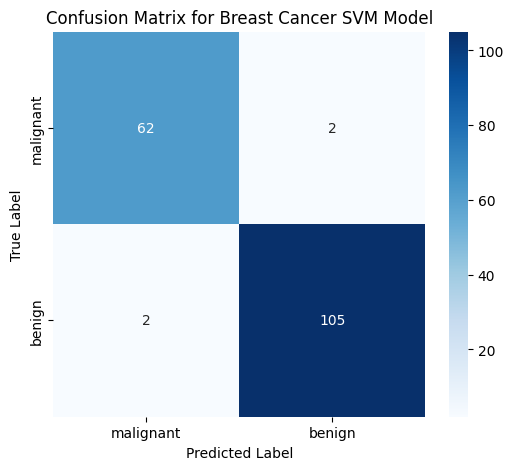

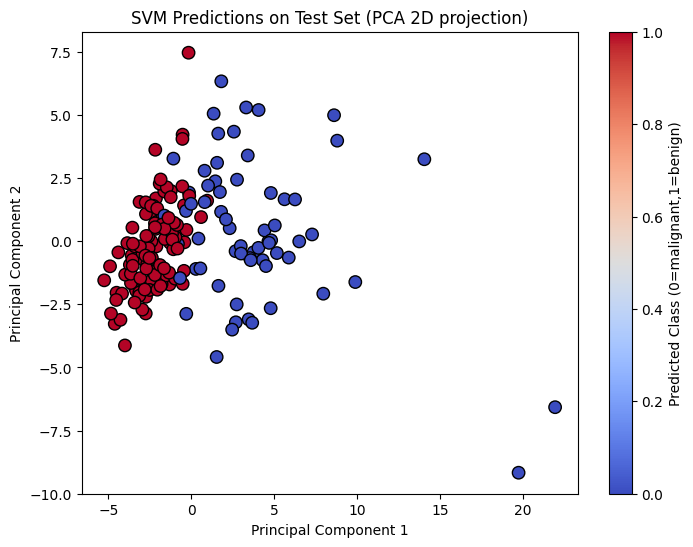

In [64]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

# -----------------------------
# Step 1: Load the Breast Cancer dataset
# -----------------------------
data = load_breast_cancer()
X = data.data        # 30 features from FNA
y = data.target      # 0 = malignant, 1 = benign

print(f"Feature shape: {X.shape}, Labels shape: {y.shape}")
print(f"Class names: {data.target_names}")

# -----------------------------
# Step 2: Split the dataset
# 70% training, 30% testing
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# -----------------------------
# Step 3: Feature scaling
# StandardScaler ensures features are on similar scale for SVM
# -----------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -----------------------------
# Step 4: Train the SVM classifier
# Using RBF kernel (good for non-linear separation)
# -----------------------------
svc_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svc_model.fit(X_train_scaled, y_train)

# -----------------------------
# Step 5: Predict on test data
# -----------------------------
y_pred = svc_model.predict(X_test_scaled)

# -----------------------------
# Step 6: Evaluate the model
# -----------------------------
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# -----------------------------
# Step 7: Visualize the results
# -----------------------------
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Breast Cancer SVM Model')
plt.show()

# Optional: Scatter plot using first two principal components for visualization
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_test_pca[:,0], X_test_pca[:,1], c=y_pred, cmap='coolwarm', edgecolors='k', s=80)
plt.title('SVM Predictions on Test Set (PCA 2D projection)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Predicted Class (0=malignant,1=benign)')
plt.show()

In [65]:
# 43. Write a Python program to implement SVM classification for breast cancerprediction with the following requirements: Data preprocessing using StandardScaler use kernel parameters for tuning.

Dataset shape: (569, 30), Target shape: (569,)
Best Hyperparameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Test Accuracy of best SVM model: 0.9708


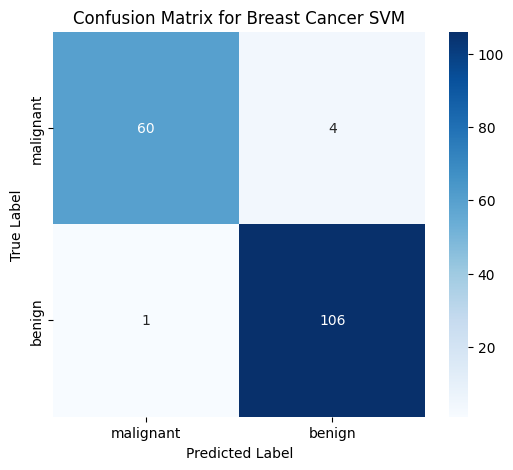

In [66]:
# -----------------------------
# Step 1: Import necessary libraries
# -----------------------------
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

# -----------------------------
# Step 2: Load the Breast Cancer dataset
# -----------------------------
data = load_breast_cancer()
X = data.data       # 30 features
y = data.target     # 0 = malignant, 1 = benign

print(f"Dataset shape: {X.shape}, Target shape: {y.shape}")

# -----------------------------
# Step 3: Split the dataset
# 70% train, 30% test
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# -----------------------------
# Step 4: Feature scaling
# StandardScaler standardizes features to mean=0 and std=1
# -----------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -----------------------------
# Step 5: SVM with hyperparameter tuning
# Using GridSearchCV to tune kernel, C, and gamma
# -----------------------------
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto']
}

svc = SVC(random_state=42)
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Best parameters from grid search
print("Best Hyperparameters:", grid_search.best_params_)

# -----------------------------
# Step 6: Evaluate the best model
# -----------------------------
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy of best SVM model: {accuracy:.4f}")

# -----------------------------
# Step 7: Confusion matrix visualization
# -----------------------------
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Breast Cancer SVM')
plt.show()

In [67]:
# 70. Implement an SVC model to classify iris flowers into three species (Setosa, Versicolor, and Virginica) based on their sepal and petal dimensions. The dataset contains 150 samples with four features: sepal length, sepal width, petal length, and petal width. Load the Dataset from sklearn.Split the dataset into training and testing sets.Train the SVC Model using the training data. Visualize the Results.

Dataset shape: (150, 4), Target shape: (150,)
Test Accuracy: 0.9333


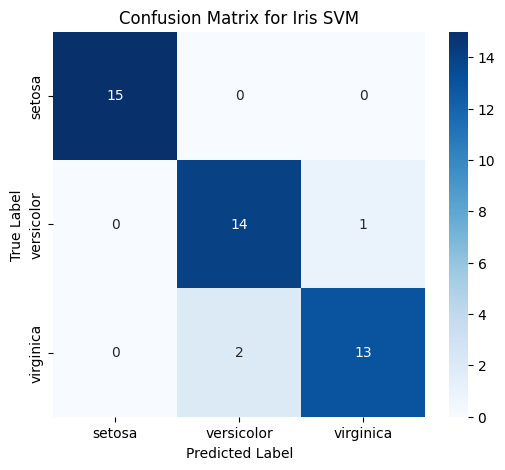

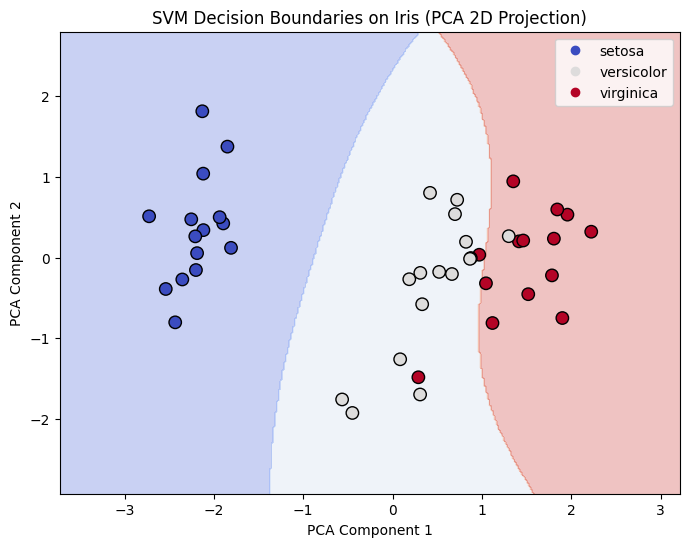

In [69]:
# -----------------------------
# Step 1: Import necessary libraries
# -----------------------------
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.decomposition import PCA

# -----------------------------
# Step 2: Load the Iris dataset
# -----------------------------
iris = load_iris()
X = iris.data        # 4 features: sepal length, sepal width, petal length, petal width
y = iris.target      # 0=Setosa, 1=Versicolor, 2=Virginica
target_names = iris.target_names

print(f"Dataset shape: {X.shape}, Target shape: {y.shape}")

# -----------------------------
# Step 3: Split the dataset
# 70% training, 30% testing
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# -----------------------------
# Step 4: Feature scaling
# SVM is sensitive to feature scales
# -----------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -----------------------------
# Step 5: Train the SVM classifier
# Using RBF kernel (handles non-linear separation)
# -----------------------------
svc_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svc_model.fit(X_train_scaled, y_train)

# -----------------------------
# Step 6: Predict test labels
# -----------------------------
y_pred = svc_model.predict(X_test_scaled)

# -----------------------------
# Step 7: Evaluate model
# -----------------------------
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Iris SVM')
plt.show()

# -----------------------------
# Step 8: Visualize decision boundaries using PCA (2D projection)
# -----------------------------
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Train SVM again on PCA-reduced 2D data for visualization
svc_2d = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svc_2d.fit(X_train_pca, y_train)

# Create meshgrid for plotting decision boundaries
x_min, x_max = X_test_pca[:,0].min() - 1, X_test_pca[:,0].max() + 1
y_min, y_max = X_test_pca[:,1].min() - 1, X_test_pca[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = svc_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
scatter = plt.scatter(X_test_pca[:,0], X_test_pca[:,1], c=y_test, cmap='coolwarm', edgecolors='k', s=80)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('SVM Decision Boundaries on Iris (PCA 2D Projection)')
# Fix: Convert target_names (numpy array) to a list to avoid boolean ambiguity error
plt.legend(handles=scatter.legend_elements()[0], labels=target_names.tolist())
plt.show()